# Ingrid Zimmermann
# RUID: 173005515
# Physics 444 Problem Set #8
# Collaborators: Patrick Staudt, Jon Zablin
# <span style="color:green">Answers are in green markdowns</span>

In [1]:
import numpy as np
import scipy as sp
import scipy.interpolate
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy import constants as c
from astropy import units as u

from progressbar import ProgressBar

from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif'
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

# <span style="color:green">Answer to Q1(a): Shown below is the plot of X as a function of temperature T </span>

$X = \frac{-1 + \sqrt{1+4f(T)}}{2f(T)}$, $f(T) = 3.84n(\frac{k_BT}{m_ec^2})^{3/2}e^{Q/k_BT}$

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


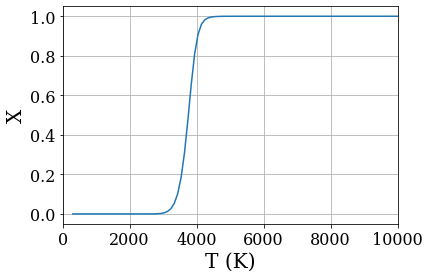

In [2]:
n=6.2e-10
m=511e3 * u.eV/ c.c**2
Q=13.57 * u.eV
#c.k_B.to(u.eV/u.K)

def X(T):
    T*=u.K
    f=3.84*n*(c.k_B*T/m/(c.c**2))**(3/2)*np.exp(Q/c.k_B/T)
    X_f = (-1. + np.sqrt(1. + 4.*f ))/(2*f)
    return X_f.decompose()

T_list = np.linspace(0,10000,100)
X_list = X(T_list)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('T (K)')
ax.set_ylabel('X')
ax.set_xlim(0,10000)
ax.plot(T_list,X_list,label = 'X')
plt.show()

# <span style="color:green">Answer to Q1(b): Shown below is a plot of X as a function of t </span>

100% |########################################################################|


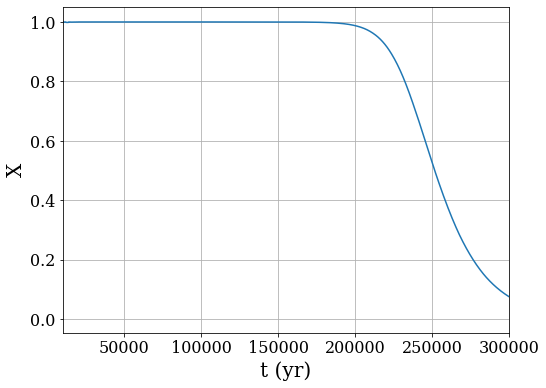

In [3]:
H0 = 67.8 *u.km/u.s/u.Mpc
wr0 = 9.03*10**(-5)
wm0 = 0.306
wl0 = 0.692
w0 = 1

H0_=H0.to(1./u.yr).value
def t_f(a,wr0):
    #returns time in years
    result = 1/ (H0_*(np.sqrt(wr0*a**(-2.) + wm0*a**(-1.) + wl0*a**2. + (1-w0))))
    return result

def t_int(a,wr0):
    result = quad(t_f,0,a,args=(wr0))[0]
    return result
    
p = ProgressBar()
a_list = np.logspace(-5,10,1000)
allt_list = np.array([t_int(a,wr0) for a in p(a_list)])*u.yr

def a_f(t):
    a_f = np.interp(t,allt_list,a_list)
    return a_f

t_list = np.linspace(1e4,3.8e5,1000)*u.yr

def Xt(t):
    a=a_f(t)
    T0=2.725 
    Xa_f = X(T0/a)
    return Xa_f

Xt_list = Xt(t_list)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('t (yr)')
ax.set_ylabel('X')
ax.set_xlim(1e4,3e5)
ax.plot(t_list,Xt_list,label = 'X')
plt.show()

#fig=plt.figure(figsize=(8,6))
#ax=fig.add_subplot(111)
#ax.plot(allt_list,a_f(allt_list))
#ax.set_xscale('log')
#ax.set_yscale('log')
#plt.plot()

# <span style="color:green">Answer to Q1(c): Shown below is a plot of the rate of photons scattering off of electrons as a function of time </span>

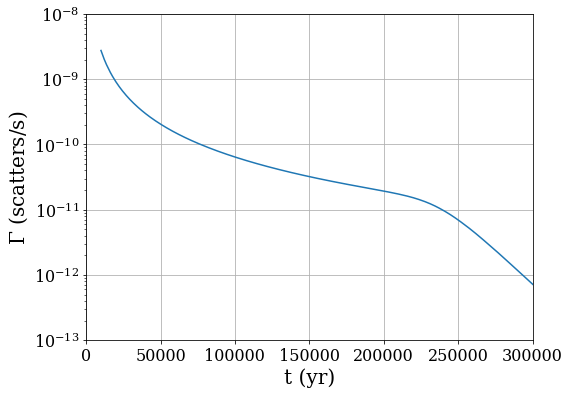

In [4]:
C = 5e-21 / u.s
def gamma(t):
    gamma = C * Xt(t) * (a_f(t) **(-3.)) 
    return gamma

gamma_list = gamma(t_list)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('t (yr)')
ax.set_ylabel('$\Gamma$ (scatters/s)')
ax.set_xlim(0,3e5)
ax.set_ylim(1e-13,1e-8)
ax.set_yscale('log')
ax.plot(t_list,gamma_list,label = 'Gamma')
plt.show()

# <span style="color:green">Work for Q1(d): Shown below is a plot of H(t) and $\Gamma$(t) </span>

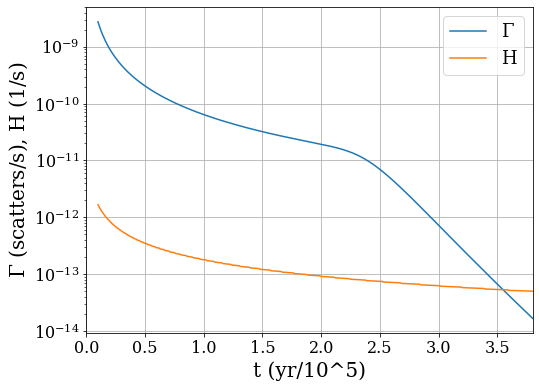

In [5]:
adot = np.gradient(a_f(t_list),t_list.to(u.yr).value) / u.yr
H = (adot/a_f(t_list)).to(1/u.s)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('t (yr/10^5)')
ax.set_ylabel('$\Gamma$ (scatters/s), H (1/s)')
ax.set_xlim(0/1e5,3.8e5/1e5)
ax.set_yscale('log')
ax.plot(t_list/1e5,gamma_list,label = '$\Gamma$')
ax.plot(t_list/1e5,H,label = 'H')
ax.legend(loc='upper right')
plt.show()

# <span style="color:green">Answer to Q1(d): Photon decoupling occurs when the age of the Universe is approximately 350,000 yrs old.  </span>

# <span style="color:green">Answer to Q1(e): Since the actual z of decoupling is actually slightly smaller than the result of solving the Saha equation due to the rate of electron-photon scatter departing from equilibrium, the actual time of decoupling is actually slightly later than suggested by the Saha equation. Therefore, my numeric solution for the age of the Universe at decoupling is slightly earlier than the actual answer.  </span>

# <span style="color:green">Answer for Q2, First question shown below: What fraction f of the blackbody photons have enough energy to ionize hydrogen?  </span>

energy density of blackbody radiation as a function of frequency f:
\begin{equation}
    n(f)df = \frac{\epsilon(f)df}{hf} = \frac{8\pi}{c^3} \frac{f^2 df}{e^{hf/kT}-1}
\end{equation}

energy density of blackbody radiation as a function of energy E:
\begin{equation}
    n(E)dE = \frac{8\pi}{c^3 h^2} \frac{E^2 dE}{e^{E/kT}-1}
\end{equation}

Number of blackbody photons as a function of energy:
\begin{equation}
    N = \int n(E) dE = \int \frac{8\pi}{c^3 h^2} \frac{E^2 dE}{e^{E/kT}-1}
\end{equation}

Number of blackbody photons with enough energy to ionize hydrogen:
\begin{equation}
    N_{ionize} = \int_{13.57eV}^{\infty} \frac{8\pi}{c^3 h^2} \frac{E^2 dE}{e^{E/kT}-1}
\end{equation}

Total number of blackbody photons:
\begin{equation}
    N_{Tot} = \int_{0}^{\infty} \frac{8\pi}{c^3 h^2} \frac{E^2 dE}{e^{E/kT}-1}
\end{equation}

Fraction f of the blackbody photons with enough energy to ionize hydrogen:
\begin{equation}
    f = \frac{N_{ionize}}{N_{Tot}}
\end{equation}

# <span style="color:black">Work for Q2, Second question shown below: What is the numerical value of f if kT = 0.323 eV? </span>

In [19]:
kT = 0.323 #in eV
cs = c.c.value
h = c.h.to(u.eV * u.s).value

def intN_f(E):
    intN_f = E**2/(np.exp(E/kT)-1)
    return intN_f #in eV^2

N_ion = quad(intN_f,13.57,np.inf)[0]*u.eV**3.
N_tot = quad(intN_f,0,np.inf)[0]*u.eV**3.

f = N_ion/N_tot
print('f = ',f)

f =  4.372403379785995e-16


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


# <span style="color:green">Answer for Q2, Second question: The numerical value of f (if kT = 0.323 eV) is 4.37e-16 </span>

# <span style="color:black">Work for Q2, Third question: How many photons per baryon have enough energy to ionize hydrogen? </span>

\begin{equation}
    f = \frac{n_{ion}}{n_{\gamma}}
\end{equation}

\begin{equation}
    n_{ion} = n_{\gamma} f
\end{equation}

\begin{equation}
    \eta = \frac{n_b}{n_\gamma}
\end{equation}

\begin{equation}
    \eta_{ion} = \frac{n_b}{n_{ion}} = \frac{n_b}{n_\gamma f}
\end{equation}

\begin{equation}
    \frac{1}{\eta_{ion}} = \frac{f}{\eta}
\end{equation}

In [21]:
eta = 6.2e-10
print('photons per baryon with enough energy to ionize hydrogen = ',f/eta)

photons per baryon with enough energy to ionize hydrogen =  7.052263515783863e-07


# <span style="color:green">Answer for Q2, Third question: The fraction of photons per baryon with enough energy to ionize hydrogen = 7.05e-7 </span>